In [1]:
# pip install -q lightning-tutorial

In [2]:
%load_ext nb_black

import lightning_tutorial as lt

<IPython.core.display.Javascript object>

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain', 'cell_type_idx'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'color_palette'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


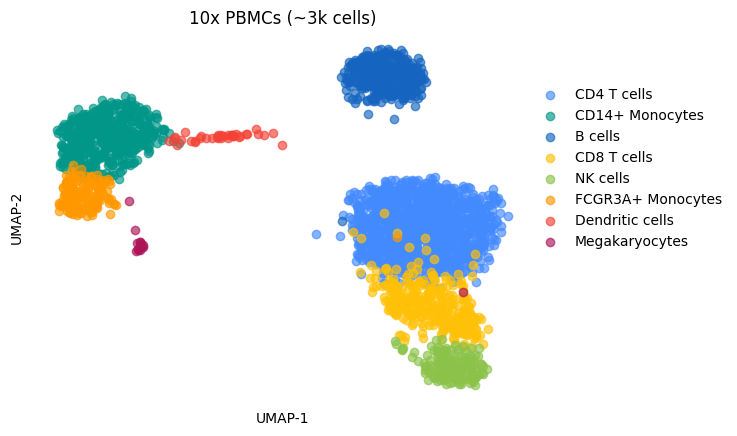

<IPython.core.display.Javascript object>

In [3]:
adata = lt.data.pbmc3k()

## 1. Creating a custom `Dataset` from our `adata`-based cell data

In [4]:
from torch.utils.data import Dataset
import torch


class CellDataset(Dataset):
    def __init__(self, adata):
        self.adata = adata
        self.n_cells = adata.shape[0]
        self.n_genes = adata.shape[1]

        ### format the data - must be torch.Tensor
        self.X = torch.Tensor(adata.X)
        self.y = torch.Tensor(adata.obs["cell_type_idx"].values)

    def __len__(self):
        return self.n_cells

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

<IPython.core.display.Javascript object>

### Instantiate the dataset by passing `adata`

In [5]:
dataset = CellDataset(adata)

<IPython.core.display.Javascript object>

### Let's sample our dataset and examine the outputs

In [6]:
import numpy as np

idx_size = 200  # take a sample of 200 cells
idx = np.random.choice(range(dataset.__len__()), [idx_size])

batch = dataset.__getitem__(idx)
X_batch, y_batch = batch[0], batch[1]
X_batch.shape, y_batch.shape

(torch.Size([200, 1838]), torch.Size([200]))

<IPython.core.display.Javascript object>

## 2. Demonstrating modularity/flexibility of the `Dataset` object

In [7]:
from torch.utils.data import random_split

L = {"total": dataset.__len__()}
L["train"] = int(L["total"] * 0.8)
L["val"] = L["total"] - L["train"]
print(L)

train_dataset, val_dataset = random_split(dataset, lengths=[L["train"], L["val"]])

{'total': 2638, 'train': 2110, 'val': 528}


<IPython.core.display.Javascript object>

## 3. Assembling  `datasets` into [`DataLoaders`]()

In [8]:
from torch.utils.data import DataLoader
import os

batch_size = 200
num_workers = int(os.cpu_count() / 2)

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers)
val_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers)

<IPython.core.display.Javascript object>